In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
n = 2000
data = [np.random.normal(1,1,1)[0] for i in range(n) if np.random.uniform(0,1)<0.3]
n1=len(data)
data.extend([np.random.normal(5,2,1)[0] for i in range(n-n1)])
n2=n-n1

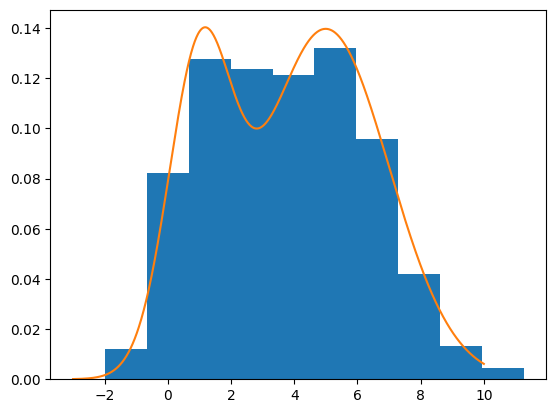

In [3]:
plt.hist(data,density=True)
x=np.linspace(-3,10,1000)
r1=norm(1,1)
r2=norm(5,2)
plt.plot(x,r1.pdf(x)*0.3+r2.pdf(x)*0.7)
plt.show()


In [4]:
n = 500
data = [np.random.normal(1,1,1)[0] for i in range(n) if np.random.uniform(0,1)<0.3]
n1=len(data)
data.extend([np.random.normal(5,2,1)[0] for i in range(n-n1)])

x=np.array(data)
mi = np.random.normal(0,10,size=2)
sigma = np.random.normal(10,10,size=2)
pi = np.array([0.5, 0.5])
for i in range(2000):
    r1 = norm(mi[0],np.sqrt(sigma[0]))
    r2 = norm(mi[1],np.sqrt(sigma[1]))
    gamma = pi[0]*r2.pdf(x)/(pi[1]*r1.pdf(x)+pi[0]*r2.pdf(x))
    
    new_mi = np.array([np.sum((1-gamma)*x)/np.sum(1-gamma), np.sum((gamma)*x)/sum(gamma)])
    new_sigma = np.array([np.sum((1-gamma)*(x-new_mi[0])**2)/np.sum(1-gamma),
                        np.sum((gamma)*(x-new_mi[1])**2)/np.sum(gamma)])

    mi = new_mi
    sigma = new_sigma
    pi = np.array([np.mean(gamma),1-np.mean(gamma)])
    

In [5]:
sigma=np.sqrt(sigma)
mi,sigma,pi

(array([1.04557412, 4.98767053]),
 array([1.03559043, 1.90818917]),
 array([0.68042638, 0.31957362]))

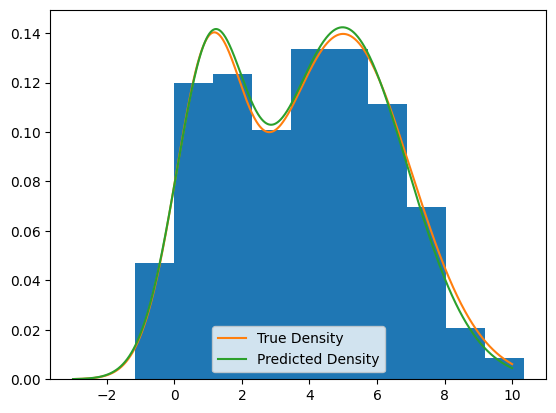

In [8]:
plt.hist(data,density=True)
x=np.linspace(-3,10,1000)
r1=norm(1,1)
r2=norm(5,2)
plt.plot(x,r1.pdf(x)*0.3+r2.pdf(x)*0.7,label="True Density")
r1=norm(mi[0],sigma[0])
r2=norm(mi[1],sigma[1])
plt.plot(x,r1.pdf(x)*pi[1]+r2.pdf(x)*pi[0],label="Predicted Density")
plt.legend()
plt.show()